<hr>
<h2><center>Disciplina : Redes Neurais Profundas</center></h2>
<h2><center>Classificação de Imagens - TensorFlow & Keras</center></h2>
<center>Prof. Julio Lopes</center>
<hr>

# Import das bibliotecas 

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import re
from unicodedata import normalize as norm
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Carregamento das Imagens

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Visualização da imagem

In [ ]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalização 

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Definição da topologia da Rede neural

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilação do modelo

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo

In [ ]:
model.fit(train_images, train_labels, epochs=10,validation_split=0.3)

# Avaliar exatidão do modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [ ]:
test_labels

In [ ]:
predictions = model.predict(test_images)

In [ ]:
test_images

In [ ]:
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels,predictions))

# Predict

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Training model with all samples

In [ ]:
dataset = np.concatenate((train_images,test_images), axis=0)

In [ ]:
labels = np.concatenate((train_labels, test_labels), axis=0)

## Create Model

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(dataset, labels, epochs=10,validation_split=0.3)

## Save model

In [ ]:
model.save("model.h5")

## Load model

In [4]:
loaded_model = tf.keras.models.load_model("model.h5")

## Load image sample

In [37]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('imageToSave.png', cv2.IMREAD_UNCHANGED)
img_gray = img[:, :, 3]

## plot image 

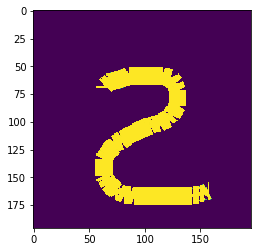

In [38]:
plt.imshow(img_gray)

## resize image sample

In [39]:
resized = cv2.resize(img_gray,(28, 28), interpolation = cv2.INTER_AREA)

In [40]:
resized =resized/255

In [41]:
resized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## plot after resize image sample

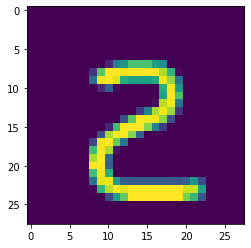

In [42]:
plt.imshow(resized)

In [43]:
np.argmax(loaded_model.predict(np.array([resized])))

2

In [44]:
resized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    